## Data Scientist Assessment - Evil Geniuses

### Data: 
A dataset of Starcraft player performance data in ranked games
### Goal:
Develop a model to predict a player’s rank and offer guidance and suggestions to the stakeholders


### EDA

In [10]:
import pandas as pd
import numpy as np
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")



df = pd.read_csv("D:/MSIA/Intern/Assessment/data/starcraft_player_data.csv")
df.head(5)
df.shape



(3395, 20)

In [11]:
df.describe()
df.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

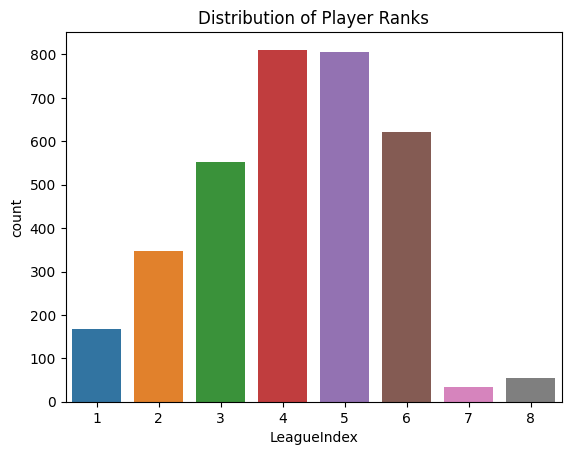

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of LeagueIndex (Rank)
sns.countplot(x='LeagueIndex', data=df)
plt.title('Distribution of Player Ranks')
plt.show()


#### Missing Values

In [13]:
# check if there are non-integer or non-float values in the columns.
for variable in df.columns:
    non_numeric_values = df[variable].loc[~pd.to_numeric(df[variable], errors='coerce').notnull()]
    count = len(non_numeric_values)
    if count > 0:
        print(f"Variable '{variable}' contains {count} non-integer or non-float values.")



Variable 'Age' contains 55 non-integer or non-float values.
Variable 'HoursPerWeek' contains 56 non-integer or non-float values.
Variable 'TotalHours' contains 57 non-integer or non-float values.


In [14]:
# the rows where TotalHours is ?
filtered_df = df[df['TotalHours'] == '?']
print(filtered_df)


      GameID  LeagueIndex Age HoursPerWeek TotalHours       APM   
358     1064            5  17           20          ?   94.4724  \
1841    5255            5  18            ?          ?  122.2470   
3340   10001            8   ?            ?          ?  189.7404   
3341   10005            8   ?            ?          ?  287.8128   
3342   10006            8   ?            ?          ?  294.0996   
3343   10015            8   ?            ?          ?  274.2552   
3344   10016            8   ?            ?          ?  274.3404   
3345   10017            8   ?            ?          ?  245.8188   
3346   10018            8   ?            ?          ?  211.0722   
3347   10021            8   ?            ?          ?  189.5778   
3348   10022            8   ?            ?          ?  210.5088   
3349   10023            8   ?            ?          ?  248.0118   
3350   10024            8   ?            ?          ?  299.2290   
3351   10025            8   ?            ?          ?  179.998

In [15]:
# fill in the ? value in the column 'TotalHours'
from sklearn.ensemble import RandomForestRegressor

# Handle missing values
df['TotalHours'] = df['TotalHours'].replace('?', float('nan')).astype(float)

# Split the dataset into train and test sets
train_data = df[df['TotalHours'].notna()]
test_data = df[df['TotalHours'].isna()]

# Prepare the data
features = ['LeagueIndex', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys',
            'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs',
            'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade',
            'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

X_train = train_data[features]
y_train = train_data['TotalHours']
X_test = test_data[features]

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict missing values
predicted_total_hours = model.predict(X_test)

# Fill in the missing values in the original dataset
df.loc[df['TotalHours'].isna(), 'TotalHours'] = predicted_total_hours

# the rows where HoursPerWeek is ?
filtered_df = df[df['HoursPerWeek'] == '?']
print(filtered_df)


      GameID  LeagueIndex Age HoursPerWeek  TotalHours       APM   
1841    5255            5  18            ?      712.83  122.2470  \
3340   10001            8   ?            ?     1087.26  189.7404   
3341   10005            8   ?            ?    41185.45  287.8128   
3342   10006            8   ?            ?    41892.55  294.0996   
3343   10015            8   ?            ?     1611.51  274.2552   
3344   10016            8   ?            ?     4092.36  274.3404   
3345   10017            8   ?            ?     2944.58  245.8188   
3346   10018            8   ?            ?     1035.35  211.0722   
3347   10021            8   ?            ?      907.03  189.5778   
3348   10022            8   ?            ?     1305.65  210.5088   
3349   10023            8   ?            ?     4302.20  248.0118   
3350   10024            8   ?            ?    41172.31  299.2290   
3351   10025            8   ?            ?     1193.40  179.9982   
3352   10026            8   ?            ?    41

In [16]:
# fill in the ? value in the column HoursPerWeek
from sklearn.ensemble import RandomForestRegressor

# Handle missing values
df['HoursPerWeek'] = df['HoursPerWeek'].replace('?', float('nan')).astype(float)

# Split the dataset into train and test sets
train_data = df[df['HoursPerWeek'].notna()]
test_data = df[df['HoursPerWeek'].isna()]

# Prepare the data
features = ['LeagueIndex', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys',
            'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs',
            'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade',
            'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

X_train = train_data[features]
y_train = train_data['HoursPerWeek']
X_test = test_data[features]

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict missing values
predicted_HoursPerWeek = model.predict(X_test)

# Fill in the missing values in the original dataset
df.loc[df['HoursPerWeek'].isna(), 'HoursPerWeek'] = predicted_HoursPerWeek

# the rows where Age is ?
filtered_df = df[df['Age'] == '?']
print(filtered_df)


      GameID  LeagueIndex Age  HoursPerWeek  TotalHours       APM   
3340   10001            8   ?         24.68     1087.26  189.7404  \
3341   10005            8   ?         36.76    41185.45  287.8128   
3342   10006            8   ?         48.04    41892.55  294.0996   
3343   10015            8   ?         44.52     1611.51  274.2552   
3344   10016            8   ?         34.54     4092.36  274.3404   
3345   10017            8   ?         49.70     2944.58  245.8188   
3346   10018            8   ?         24.08     1035.35  211.0722   
3347   10021            8   ?         25.82      907.03  189.5778   
3348   10022            8   ?         28.40     1305.65  210.5088   
3349   10023            8   ?         27.88     4302.20  248.0118   
3350   10024            8   ?         35.92    41172.31  299.2290   
3351   10025            8   ?         22.96     1193.40  179.9982   
3352   10026            8   ?         45.90    41229.80  340.1982   
3353   10028            8   ?     

In [17]:
# fill in the ? value in the column Age
from sklearn.ensemble import RandomForestRegressor

# Handle missing values
df['Age'] = df['Age'].replace('?', float('nan')).astype(float)

# Split the dataset into train and test sets
train_data = df[df['Age'].notna()]
test_data = df[df['Age'].isna()]

# Prepare the data
features = ['LeagueIndex', 'APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys',
            'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs',
            'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade',
            'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed','TotalHours','HoursPerWeek']

X_train = train_data[features]
y_train = train_data['HoursPerWeek']
X_test = test_data[features]

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict missing values
predicted_Age = model.predict(X_test)

# Fill in the missing values in the original dataset
df.loc[df['Age'].isna(), 'Age'] = predicted_Age

# the rows where LeagueIndex = 8
print(df.head())


   GameID  LeagueIndex   Age  HoursPerWeek  TotalHours       APM   
0      52            5  27.0          10.0      3000.0  143.7180  \
1      55            5  23.0          10.0      5000.0  129.2322   
2      56            4  30.0          10.0       200.0   69.9612   
3      57            3  19.0          20.0       400.0  107.6016   
4      58            3  32.0          10.0       500.0  122.8908   

   SelectByHotkeys  AssignToHotkeys  UniqueHotkeys  MinimapAttacks   
0         0.003515         0.000220              7        0.000110  \
1         0.003304         0.000259              4        0.000294   
2         0.001101         0.000336              4        0.000294   
3         0.001034         0.000213              1        0.000053   
4         0.001136         0.000327              2        0.000000   

   MinimapRightClicks  NumberOfPACs  GapBetweenPACs  ActionLatency   
0            0.000392      0.004849         32.6677        40.8673  \
1            0.000432      0.0

In [18]:
# the rows where LeagueIndex is 8
filtered_dff = df[df['LeagueIndex'] == 8]
print(filtered_dff)

      GameID  LeagueIndex    Age  HoursPerWeek  TotalHours       APM   
3340   10001            8  24.00         24.68     1087.26  189.7404  \
3341   10005            8  36.00         36.76    41185.45  287.8128   
3342   10006            8  48.16         48.04    41892.55  294.0996   
3343   10015            8  42.00         44.52     1611.51  274.2552   
3344   10016            8  36.00         34.54     4092.36  274.3404   
3345   10017            8  49.72         49.70     2944.58  245.8188   
3346   10018            8  24.00         24.08     1035.35  211.0722   
3347   10021            8  24.00         25.82      907.03  189.5778   
3348   10022            8  28.00         28.40     1305.65  210.5088   
3349   10023            8  28.00         27.88     4302.20  248.0118   
3350   10024            8  36.00         35.92    41172.31  299.2290   
3351   10025            8  24.00         22.96     1193.40  179.9982   
3352   10026            8  48.10         45.90    41229.80  340.

In [95]:
# check if there are non-integer or non-float values in the columns.
for variable in df.columns:
    non_numeric_values = df[variable].loc[~pd.to_numeric(df[variable], errors='coerce').notnull()]
    count = len(non_numeric_values)
    if count > 0:
        print(f"Variable '{variable}' contains {count} non-integer or non-float values.")



#### Distribution of the Data

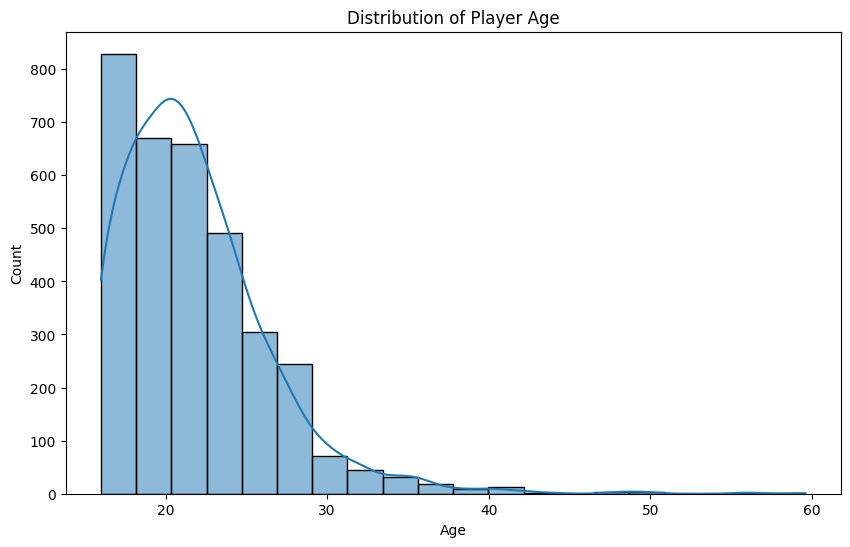

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Count')
# plt.gca().invert_xaxis()  # Invert the x-axis to display age in ascending order
plt.show()


#### 
The Age is skewed and needs to normalize before the model training. Let's see if other features also need normalizing before model training.

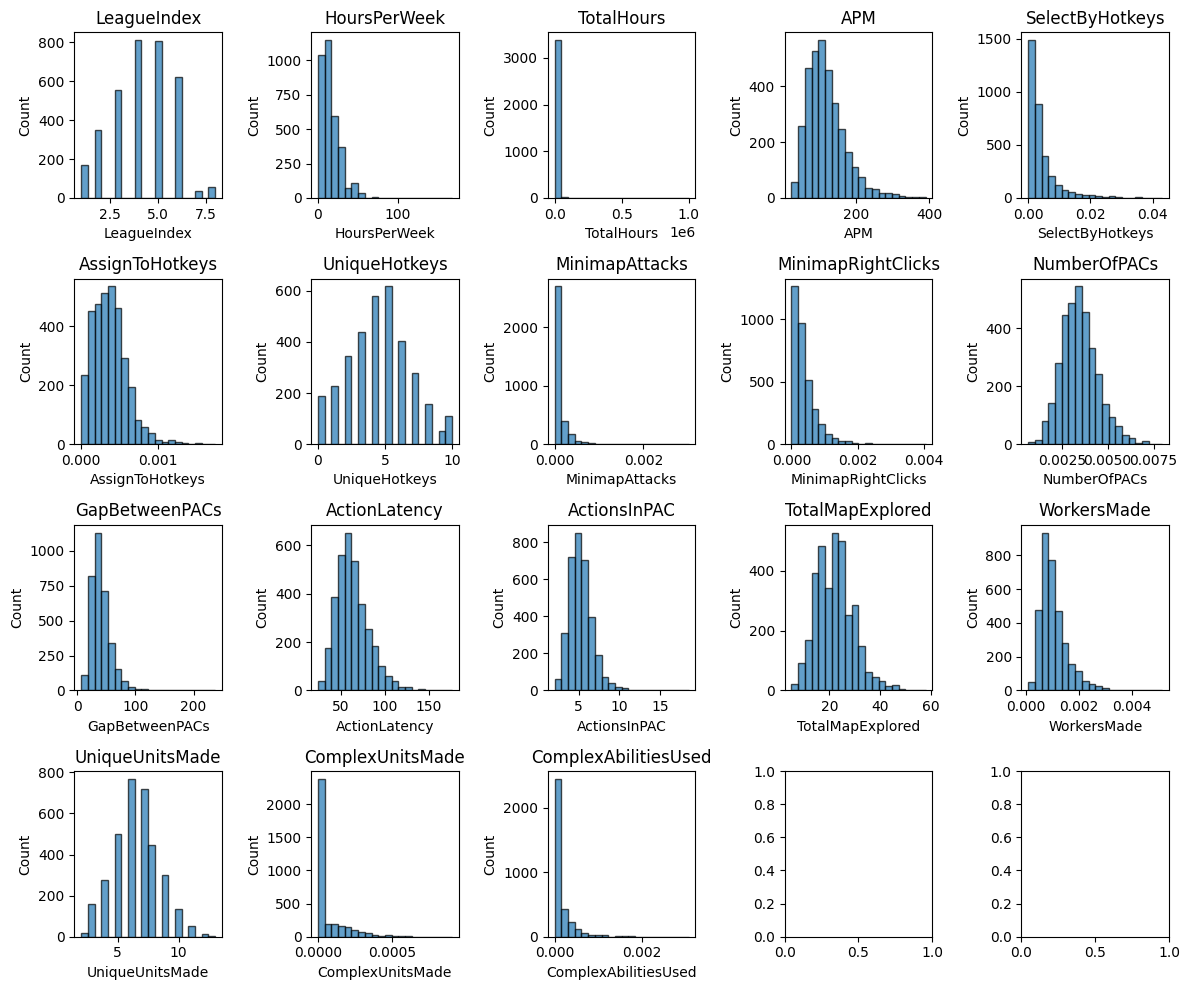

In [74]:

# Define the variables for the histograms
variables = ['LeagueIndex', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys',
             'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
             'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC',
             'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
             'ComplexAbilitiesUsed']

# Create a 4x5 grid of histograms
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.flatten()

# Iterate over variables and create histograms
for i, variable in enumerate(variables):
    axes[i].hist(df[variable], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(variable)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


#### The Histogram Result showed that 
The following features do *not* need log tranformation: 'LeagueIndex', 'UniqueHotkeys', 'NumberOfPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'UniqueUnitsMade'.

The following features need normalization before model training: 'Age', 'HoursPerWeek','SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade'.

#### Outliers

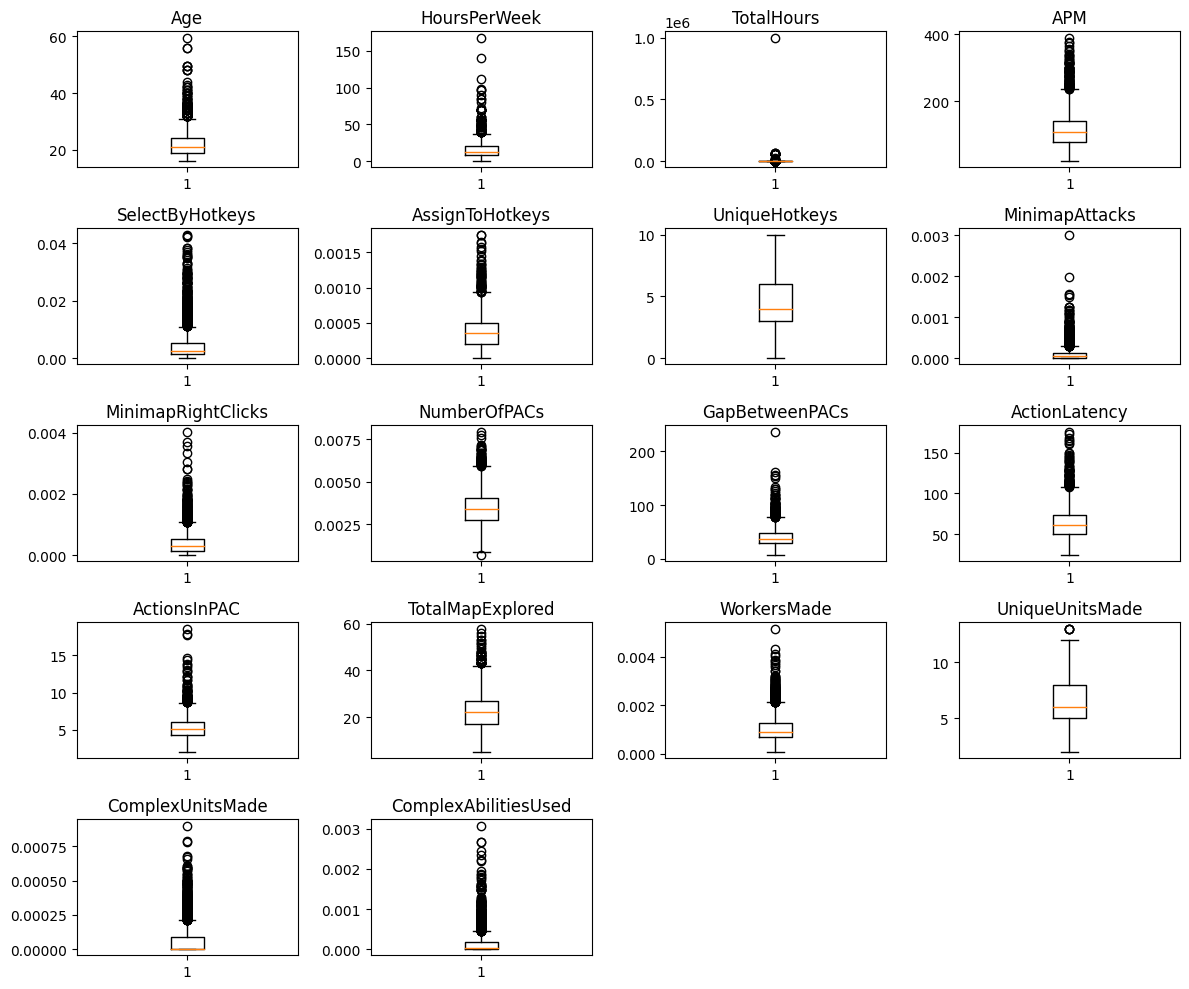

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Select features
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
            'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
            'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
            'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']

# Plot box plots for each feature
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()


In [76]:
## remove outliers

import pandas as pd
import numpy as np

# Select features
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys',
            'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
            'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC',
            'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
            'ComplexAbilitiesUsed']

# Define the z-score threshold for outlier detection
z_threshold = 5

# Iterate over each feature
for feature in features:
    # Calculate the z-scores for each data point in the feature column
    z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())

    # Identify outliers based on the z-score threshold
    outliers = df[z_scores > z_threshold]

    # Remove outliers from the DataFrame
    df = df.drop(outliers.index)

# Print the updated DataFrame without outliers
print(df.shape)


(3257, 20)


In [77]:
df.LeagueIndex.value_counts()

LeagueIndex
4    795
5    779
6    584
3    543
2    341
1    157
7     30
8     28
Name: count, dtype: int64

## Feature Engineering & Feature Selection

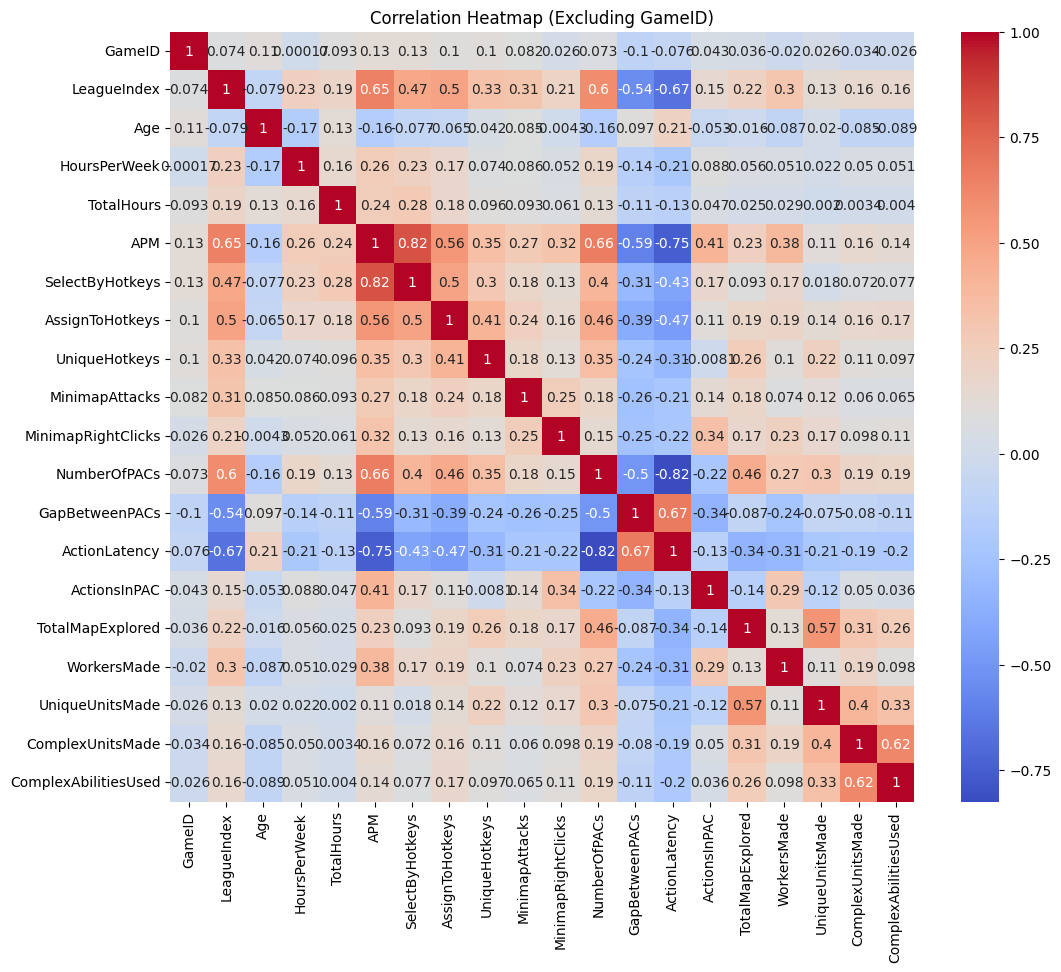

In [78]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Excluding GameID)')
plt.show()


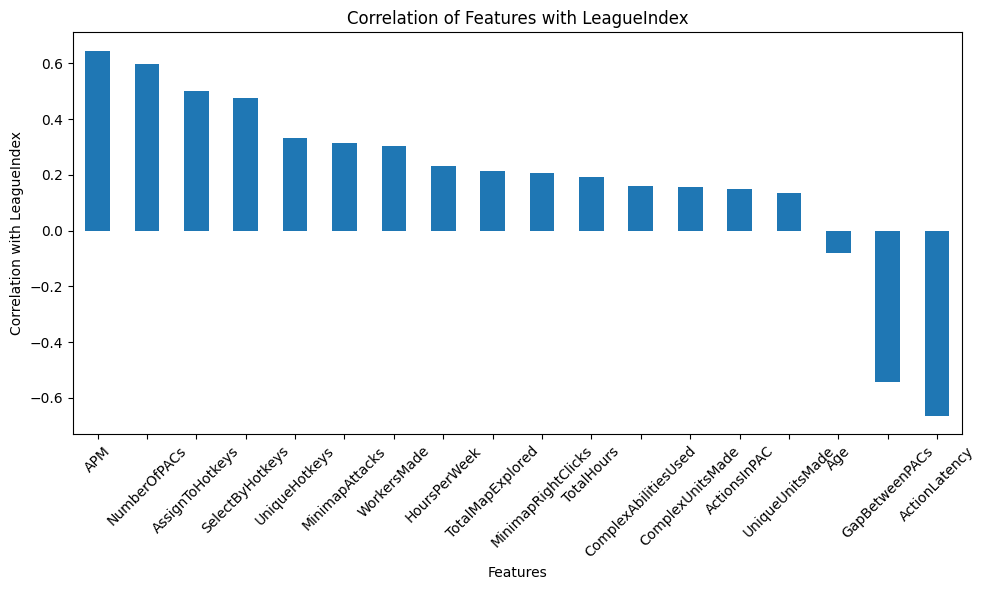

In [79]:

# Select features (excluding LeagueIndex and GameID)
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys',
            'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
            'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC',
            'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
            'ComplexAbilitiesUsed']

# Calculate correlations
correlations = df[features + ['LeagueIndex']].corr()['LeagueIndex'].drop('LeagueIndex')

# Sort correlations in descending order
correlations = correlations.sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with LeagueIndex')
plt.title('Correlation of Features with LeagueIndex')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####
From the plot, we can see that APM, NumberOfPACs, AssignToHotkeys, and SelectByHotkeys are the 4 most positively correlated features with LeagueIndex, while ActionLatency and GapBetweenPACs are the top 2 most negatively correlated features with LeagueIndex.

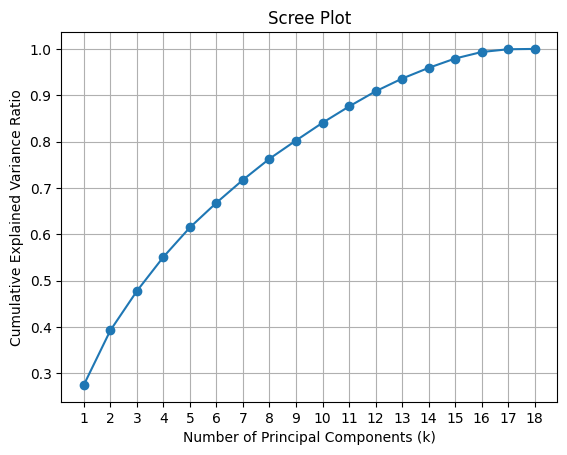

In [80]:
## PCA for feature selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select features (excluding LeagueIndex and GameID)
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys',
            'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
            'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC',
            'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
            'ComplexAbilitiesUsed']

# Prepare the data
X = df[features]
y = df['LeagueIndex']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()


####
From the Plot above, we can see that K = 12 when Cumulative explained variance ratio reaches 0.9. This means that the first 12 principal components contribute significantly to explaining the variability in the dataset. From my analysis, removing additional features beyond the 12 principal components may not be necessary since they contribute less to the explained variance and we'd better keep most of the 
features.

### Model

####
Logistic regression

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# Select features and target variable
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys',
            'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks',
            'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC',
            'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
            'ComplexAbilitiesUsed']

target = 'LeagueIndex'

# Prepare the data
X = df[features]
y = df[target]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify the skewed variables
skewed_vars = ['HoursPerWeek', 'SelectByHotkeys', 'AssignToHotkeys',
               'MinimapAttacks', 'GapBetweenPACs', 'WorkersMade',
               'ComplexUnitsMade', ]

# Normalize skewed variables using log transformation
X_train[skewed_vars] = np.log1p(X_train[skewed_vars])
X_test[skewed_vars] = np.log1p(X_test[skewed_vars])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
logreg_report = classification_report(y_test, y_pred)
print(logreg_report)


              precision    recall  f1-score   support

           1       0.31      0.19      0.23        27
           2       0.30      0.28      0.29        69
           3       0.49      0.32      0.39       114
           4       0.36      0.49      0.42       157
           5       0.41      0.42      0.41       161
           6       0.57      0.57      0.57       115
           7       0.00      0.00      0.00         6
           8       0.60      1.00      0.75         3

    accuracy                           0.42       652
   macro avg       0.38      0.41      0.38       652
weighted avg       0.42      0.42      0.41       652



####
Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report

# Split the data into features (X) and target variable (y)
X = df.drop(['LeagueIndex','GameID'], axis=1)
y = df['LeagueIndex']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=kfold, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END ma

In [84]:
# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
rf_report = classification_report(y_test, y_pred)
print(rf_report)

              precision    recall  f1-score   support

           1       0.30      0.11      0.16        27
           2       0.35      0.35      0.35        69
           3       0.36      0.32      0.33       114
           4       0.38      0.46      0.42       157
           5       0.43      0.45      0.44       161
           6       0.56      0.53      0.54       115
           7       0.00      0.00      0.00         6
           8       1.00      0.67      0.80         3

    accuracy                           0.42       652
   macro avg       0.42      0.36      0.38       652
weighted avg       0.41      0.42      0.41       652



####
Xgboost

In [85]:
# make index consistant with xgboost 
df['LeagueIndex'] = df['LeagueIndex'] - 1

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report

# Split the data into features (X) and target variable (y)
X = df.drop(['LeagueIndex','GameID'], axis=1)
y = df['LeagueIndex']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform grid search with cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=kfold, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END 

In [88]:
# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
xgb_report = classification_report(y_test, y_pred)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.47      0.30      0.36        27
           1       0.31      0.28      0.29        69
           2       0.31      0.24      0.27       114
           3       0.37      0.47      0.42       157
           4       0.44      0.43      0.43       161
           5       0.52      0.57      0.54       115
           6       0.00      0.00      0.00         6
           7       0.60      1.00      0.75         3

    accuracy                           0.41       652
   macro avg       0.38      0.41      0.38       652
weighted avg       0.40      0.41      0.40       652



##
Neural Network

In [89]:
# make index consistant with nerual network # 
df['LeagueIndex'] = df['LeagueIndex'] + 1

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Select features and target variable
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
            'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
            'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
            'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']
target = 'LeagueIndex'

# Prepare the data
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize skewed variables using log transformation
skewed_vars = ['HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
               'MinimapAttacks', 'MinimapRightClicks', 'GapBetweenPACs', 'WorkersMade',
               'ComplexUnitsMade', 'ComplexAbilitiesUsed']
X_train[skewed_vars] = np.log1p(X_train[skewed_vars])
X_test[skewed_vars] = np.log1p(X_test[skewed_vars])

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network classifier
mlp = MLPClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (200,), (300,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
}


In [91]:

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Best Score:  0.4049904030710173


In [92]:

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model = 
nn_report = classification_report(y_test, y_pred)
print(nn_report)


              precision    recall  f1-score   support

           1       0.50      0.26      0.34        27
           2       0.27      0.29      0.28        69
           3       0.42      0.35      0.38       114
           4       0.41      0.46      0.44       157
           5       0.44      0.40      0.42       161
           6       0.52      0.63      0.57       115
           7       0.00      0.00      0.00         6
           8       1.00      1.00      1.00         3

    accuracy                           0.43       652
   macro avg       0.45      0.43      0.43       652
weighted avg       0.43      0.43      0.42       652



## Evaluation

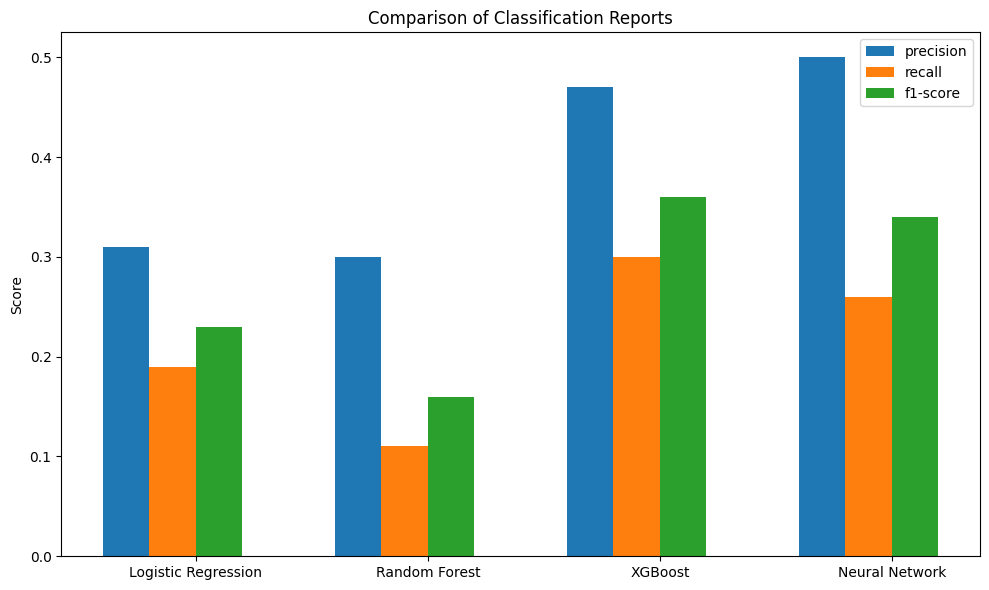

In [94]:
import re

# Define the models and their classification reports
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network']
reports = [logreg_report, rf_report, xgb_report, nn_report]

# Define the performance metrics to compare (e.g., precision, recall, F1-score)
metrics = ['precision', 'recall', 'f1-score']

# Initialize an empty dictionary to store the metric values
metric_values = {}

# Iterate over the reports
for report, model in zip(reports, models):
    # Extract the metric values using regular expressions
    values = re.findall(r'\d+\.\d+', report)
    # Convert the values to float
    values = [float(value) for value in values]
    # Store the metric values for the model
    metric_values[model] = values

# Create a numpy array of the metric values
metric_array = np.array([metric_values[model] for model in models])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
bar_width = 0.2
x_pos = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(x_pos + i * bar_width, metric_array[:, i], width=bar_width, label=metric)

# Set the x-axis labels
ax.set_xticks(x_pos + 1.5 * bar_width)
ax.set_xticklabels(models)

# Set the y-axis label
ax.set_ylabel('Score')

# Set the title
ax.set_title('Comparison of Classification Reports')

# Add a legend
ax.legend(metrics, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()



## Results and Interprets:
In each report, there are following metrics for each class (rank category):
- Precision: The proportion of correctly predicted instances for a specific class out of all instances predicted as that class.
- Recall: The proportion of correctly predicted instances for a specific class out of all instances belonging to that class.
- F1-score: A harmonic mean of precision and recall, providing a balanced measure of the model's accuracy for a specific class.
- Support: The number of instances in the test set belonging to each class.


Comparing the accuracy values for each model:
- Logistic Regression: Accuracy = 0.42
- Random Forest: Accuracy = 0.42
- XGBoost: Accuracy = 0.41
- Neural Network: Accuracy = 0.43

Based on the accuracy metric, the Neural Network model achieved the highest accuracy of 0.43 and the precision, recall, and F1-score for most classes show improvement compared to the previous models. Therefore, Neural Network would be the optimal model for predicting player LeagueIndex or Rank for this dataset.